In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")

In [ ]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(43664, 31)
              Time            V1            V2            V3            V4  \
count  43664.00000  43664.000000  43664.000000  43664.000000  43664.000000   
mean   26888.25284     -0.233273      0.031606      0.700508      0.191731   
std    12814.99066      1.881487      1.614103      1.524287      1.407338   
min        0.00000    -56.407510    -72.715728    -32.454198     -5.172595   
25%    18719.75000     -0.980241     -0.538882      0.225681     -0.715653   
50%    31883.00000     -0.244783      0.091807      0.804944      0.190472   
75%    36950.00000      1.158119      0.740709      1.437905      1.071096   
max    41600.00000      1.960497     17.930550      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  43664.000000  43664.000000  43664.000000  43664.000000  43664.000000   
mean      -0.243618      0.099239     -0.117611      0.051499      0.173603   
std        1.409001      1.310495      1.272765 

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0030784074984493096
Fraud Cases: 134
Valid Transactions: 43529


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     134.000000
mean       93.928433
std       231.551248
min         0.000000
25%         1.000000
50%         6.455000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
print("Details of valid transaction")
valid.Amount.describe()

Details of valid transaction


count    43529.000000
mean        90.302800
std        238.465356
min          0.000000
25%          7.580000
50%         24.900000
75%         81.400000
max       7879.420000
Name: Amount, dtype: float64

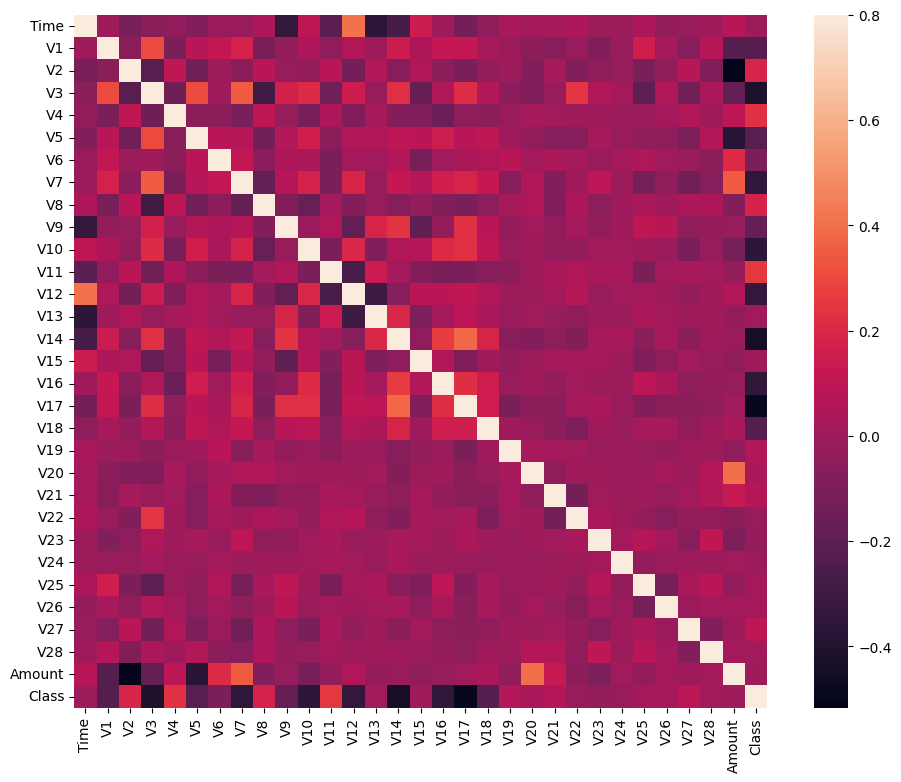

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(43664, 30)
(43664,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
# Remove instances with missing labels from training data
filtered_xTrain = xTrain[~np.isnan(yTrain)]
filtered_yTrain = yTrain[~np.isnan(yTrain)]

# Create and train the RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(filtered_xTrain, filtered_yTrain)
yPred = rfc.predict(xTest)

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9991053455602773
The precision is 1.0
The recall is 0.7647058823529411
The F1-Score is 0.8666666666666666
The Matthews correlation coefficient is0.8740822271351989


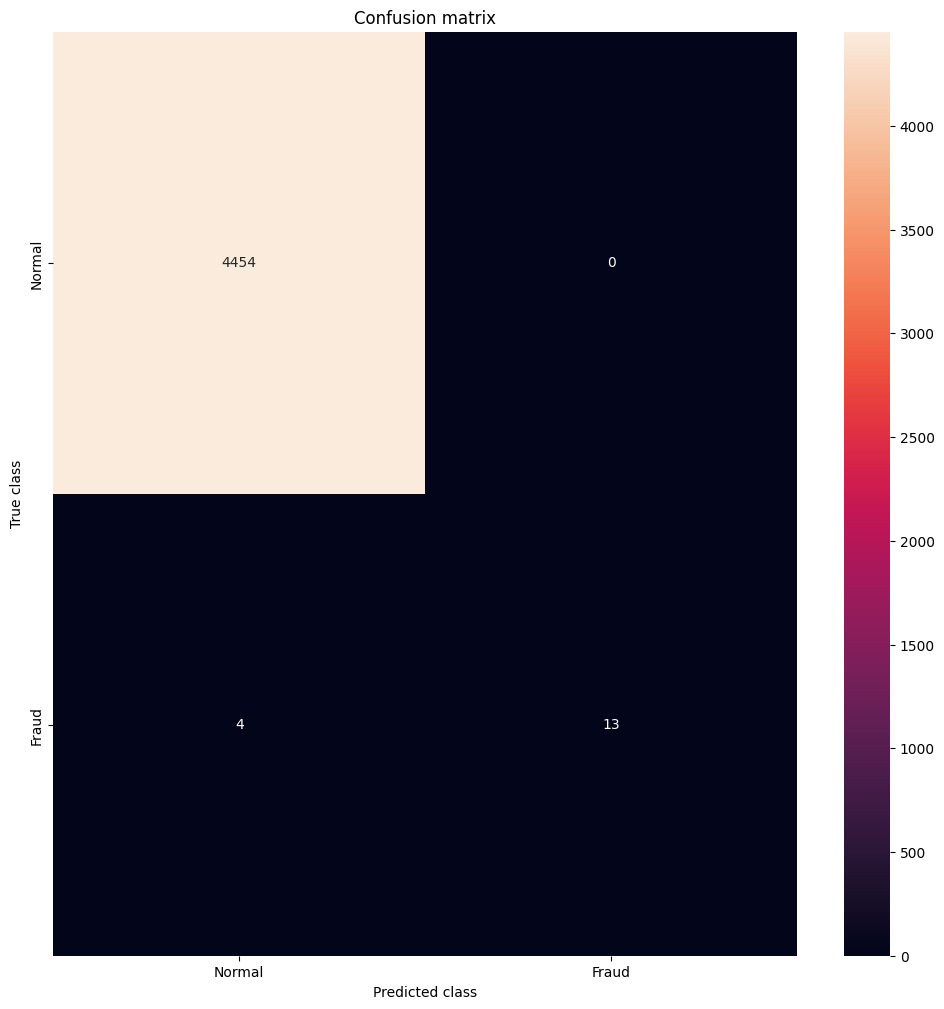

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()